In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv(r"C:\Users\shata\OneDrive\Desktop\puthon\matches.csv")

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
matches.drop('method',axis=1,inplace=True)
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [5]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [6]:
matches.sample(15)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
648,1136573,2018,Kolkata,16-04-2018,League,N Rana,Eden Gardens,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,Kolkata Knight Riders,runs,71.0,201.0,20.0,N,AK Chaudhary,A Nand Kishore
577,1082591,2017,Hyderabad,05-04-2017,League,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,208.0,20.0,N,AY Dandekar,NJ Llong
896,1304067,2022,Mumbai,11-04-2022,League,KS Williamson,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,163.0,20.0,N,Chirra Ravikanthreddy,RJ Tucker
335,598010,2013,Delhi,12-04-2013,League,A Mishra,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,3.0,115.0,20.0,N,Aleem Dar,Subroto Das
392,598067,2013,Pune,19-05-2013,League,LJ Wright,Subrata Roy Sahara Stadium,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,Pune Warriors,runs,38.0,173.0,20.0,N,NJ Llong,SJA Taufel
289,548350,2012,Bangalore,02-05-2012,League,Azhar Mahmood,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,4.0,159.0,20.0,N,BF Bowden,C Shamshuddin
280,548341,2012,Pune,26-04-2012,League,CL White,Subrata Roy Sahara Stadium,Pune Warriors,Deccan Chargers,Deccan Chargers,bat,Deccan Chargers,runs,18.0,178.0,20.0,N,S Ravi,RJ Tucker
868,1254094,2021,Dubai,07-10-2021,League,KL Rahul,Dubai International Cricket Stadium,Chennai Super Kings,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,6.0,135.0,20.0,N,K Srinivasan,RK Illingworth
705,1175365,2019,Delhi,30-03-2019,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,0.0,186.0,20.0,Y,AY Dandekar,Nitin Menon
257,548315,2012,Bangalore,10-04-2012,League,L Balaji,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,42.0,166.0,20.0,N,S Ravi,RJ Tucker


In [7]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
matches.replace(to_replace=team_dup,inplace=True)

In [8]:
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)

C:\Users\shata\AppData\Local\Temp\ipykernel_8128\11222071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].replace(to_replace=city_dup,inplace=True)


In [9]:

matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)

In [10]:
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [11]:
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

In [12]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
15
34


In [13]:
matches.venue.unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Sa

In [14]:
venue_count=matches.venue.value_counts()
venue_count

venue
Wankhede Stadium                                                         118
M Chinnaswamy Stadium                                                     94
Eden Gardens                                                              93
Rajiv Gandhi International Stadium                                        77
Feroz Shah Kotla                                                          60
Sawai Mansingh Stadium                                                    57
MA Chidambaram Stadium                                                    57
Punjab Cricket Association Stadium                                        51
Maharashtra Cricket Association Stadium                                   51
Dubai International Cricket Stadium                                       46
Dr DY Patil Sports Academy                                                37
Sheikh Zayed Stadium                                                      37
Arun Jaitley Stadium                                                  

In [15]:
top_venues=venue_count.head(15)
top_cities=matches.city.value_counts()
top_cities_15=top_cities.head(15)

Text(0, 0.5, 'No.of matches')

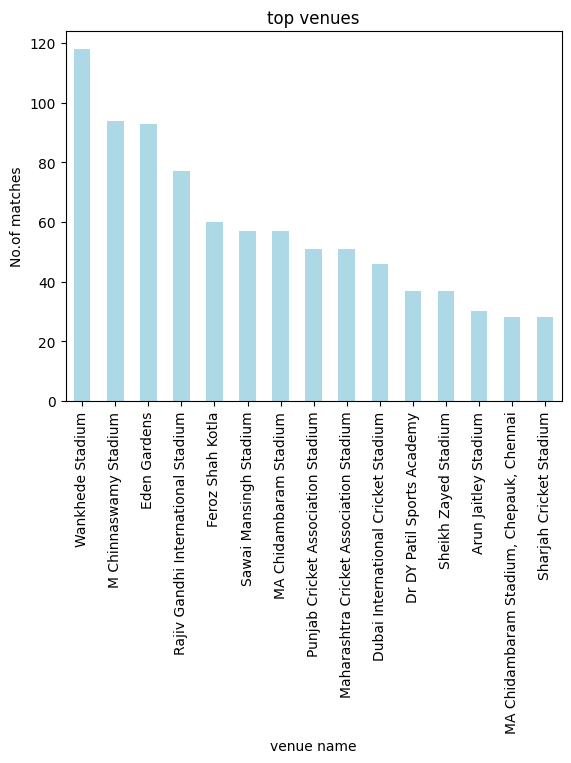

In [16]:
top_venues.plot(kind='bar',color='lightblue')
plt.title('top venues')
plt.xlabel('venue name')
plt.ylabel('No.of matches')

Text(0, 0.5, 'No.of matches')

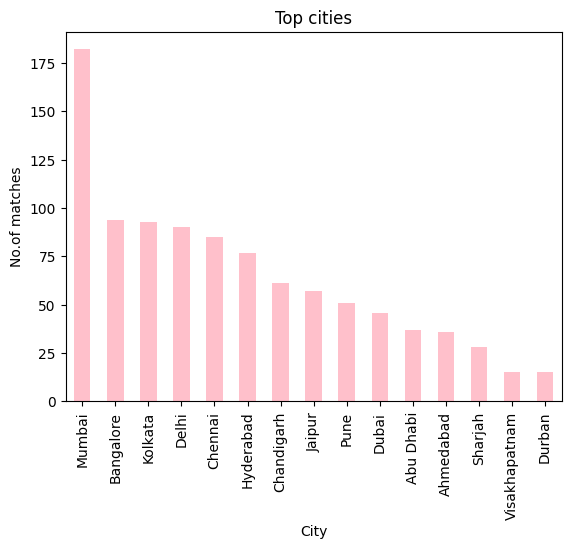

In [21]:
top_cities_15.plot(kind='bar',color='pink')
plt.title('Top cities')
plt.xlabel('City')
plt.ylabel('No.of matches')

In [22]:
venues_with_cities = matches.groupby(['city', 'venue']).size().reset_index(name='Matches Count')
sorted=venues_with_cities.sort_values(by='Matches Count', ascending=False)
top_10_venues_with_city = sorted.head(15)
top_10_venues_with_city

,city,venue,Matches Count
31,Mumbai,Wankhede Stadium,118
3,Bangalore,M Chinnaswamy Stadium,94
26,Kolkata,Eden Gardens,93
19,Hyderabad,Rajiv Gandhi International Stadium,77
13,Delhi,Feroz Shah Kotla,60
21,Jaipur,Sawai Mansingh Stadium,57
9,Chennai,MA Chidambaram Stadium,57
8,Chandigarh,Punjab Cricket Association Stadium,51
34,Pune,Maharashtra Cricket Association Stadium,51
15,Dubai,Dubai International Cricket Stadium,46


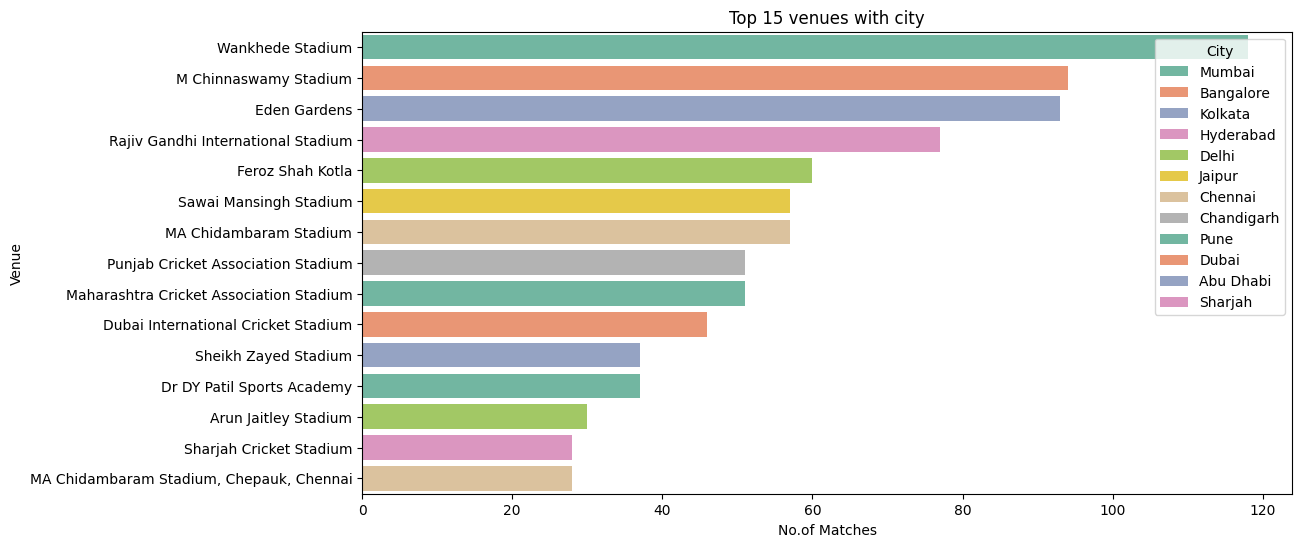

          city                                     venue  Matches Count
31      Mumbai                          Wankhede Stadium            118
3    Bangalore                     M Chinnaswamy Stadium             94
26     Kolkata                              Eden Gardens             93
19   Hyderabad        Rajiv Gandhi International Stadium             77
13       Delhi                          Feroz Shah Kotla             60
21      Jaipur                    Sawai Mansingh Stadium             57
9      Chennai                    MA Chidambaram Stadium             57
8   Chandigarh        Punjab Cricket Association Stadium             51
34        Pune   Maharashtra Cricket Association Stadium             51
15       Dubai       Dubai International Cricket Stadium             46
0    Abu Dhabi                      Sheikh Zayed Stadium             37
30      Mumbai                Dr DY Patil Sports Academy             37
12       Delhi                      Arun Jaitley Stadium        

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Matches Count', y='venue', hue='city', data=top_10_venues_with_city, palette='Set2')
plt.title('Top 15 venues with city')
plt.xlabel('No.of Matches')
plt.ylabel('Venue')
plt.legend(title='City', loc='upper right')
plt.show()
print(top_10_venues_with_city)

In [24]:
no_of_venues=matches.groupby('city')['venue'].nunique().reset_index(name='Number of Venues')
top_cities_having_more_stadium=no_of_venues.sort_values(by='Number of Venues',ascending=False)
top_5_cities=top_cities_having_more_stadium.head(5)
top_5_cities

,city,Number of Venues
25,Mumbai,3
1,Ahmedabad,2
6,Chandigarh,2
7,Chennai,2
9,Delhi,2
